In [1]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [57]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=None)
xgc = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=6)
cbc = CatBoostClassifier(iterations=30,
                           learning_rate=0.1,
                           depth=6,
                           l2_leaf_reg=3,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')
param = {'num_leaves': 31, 'objective': 'multiclass','num_class':4}
param['metric'] = 'auc_mu'
num_round=10


le = LabelEncoder()

In [47]:
X = pd.read_csv("data.csv",index_col=0)
Y = pd.read_csv("labels.csv",index_col=0)
Y['encoded_labels']=le.fit_transform(Y['disease_type'])

normalized_X = X.div(X.sum(axis=1), axis=0)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [48]:
rfc.fit(X_train,Y_train['disease_type'])

RandomForestClassifier()

In [49]:
rfc_y_pred=rfc.predict(X_test)

In [50]:
acc=accuracy_score(Y_test['disease_type'],rfc_y_pred)
acc

0.9719626168224299

In [51]:
xgc.fit(X_train,Y_train['encoded_labels'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [52]:
xgc_y_pred=xgc.predict(X_test)

In [53]:
acc=accuracy_score(Y_test['encoded_labels'],xgc_y_pred)
acc

0.9906542056074766

In [54]:
cbc.fit(X_train,Y_train['encoded_labels'])

0:	learn: 0.7540323	total: 128ms	remaining: 3.72s
1:	learn: 0.8185484	total: 236ms	remaining: 3.3s
2:	learn: 0.8145161	total: 351ms	remaining: 3.16s
3:	learn: 0.8669355	total: 470ms	remaining: 3.06s
4:	learn: 0.8790323	total: 590ms	remaining: 2.95s
5:	learn: 0.9032258	total: 699ms	remaining: 2.8s
6:	learn: 0.9274194	total: 808ms	remaining: 2.65s
7:	learn: 0.9314516	total: 929ms	remaining: 2.55s
8:	learn: 0.9274194	total: 1.06s	remaining: 2.48s
9:	learn: 0.9354839	total: 1.19s	remaining: 2.37s
10:	learn: 0.9596774	total: 1.3s	remaining: 2.24s
11:	learn: 0.9758065	total: 1.42s	remaining: 2.13s
12:	learn: 0.9758065	total: 1.52s	remaining: 1.99s
13:	learn: 0.9758065	total: 1.63s	remaining: 1.86s
14:	learn: 0.9758065	total: 1.74s	remaining: 1.74s
15:	learn: 0.9677419	total: 1.84s	remaining: 1.61s
16:	learn: 0.9717742	total: 1.94s	remaining: 1.48s
17:	learn: 0.9758065	total: 2.04s	remaining: 1.36s
18:	learn: 0.9758065	total: 2.15s	remaining: 1.24s
19:	learn: 0.9838710	total: 2.25s	remaining:

In [55]:
cbc_y_pred = cbc.predict(X_test)
preds_proba = cbc.predict_proba(X_test)

In [62]:
train_data = lgb.Dataset(X_train,label=Y_train['encoded_labels'])
lgc = lgb.train(param, train_data, num_round)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41862
[LightGBM] [Info] Number of data points in the train set: 248, number of used features: 1492
[LightGBM] [Info] Start training from score -1.156720
[LightGBM] [Info] Start training from score -1.209364
[LightGBM] [Info] Start training from score -3.028522
[LightGBM] [Info] Start training from score -1.082612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [75]:
lgc_y_pred_proba=lgc.predict(X_test,num_iteration=lgc.best_iteration)
lgc_y_pred=np.argmax(lgc_y_pred_proba, axis=1)

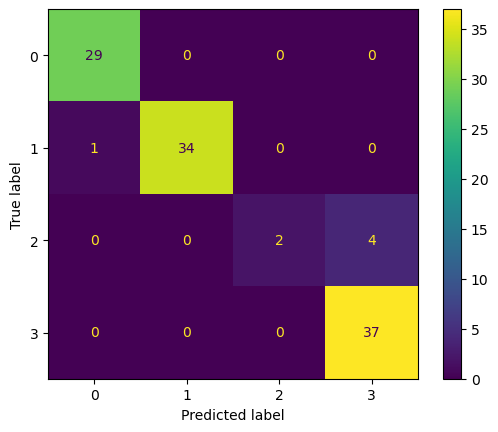

In [77]:
cm = confusion_matrix(Y_test['encoded_labels'], lgc_y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

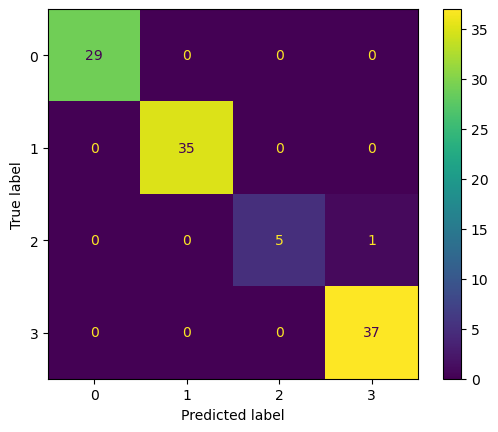

In [72]:
cm = confusion_matrix(Y_test['encoded_labels'], xgc_y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

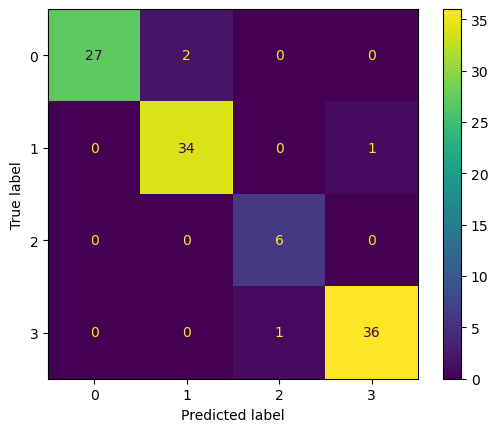

In [39]:
cm = confusion_matrix(Y_test['disease_type'], rfc_y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

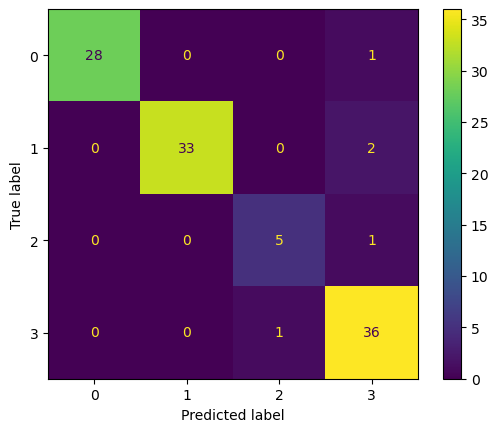

In [40]:
cm = confusion_matrix(Y_test['encoded_labels'], cbc_y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()